In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Univariate Forecasting

In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/ts_FB_Walmart_.csv')
df = df.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})
df['y_orig'] = df['y'] 
df['y'] = np.log(df['y'])

In [ ]:
df.head(5)

,ds,y,y_orig
0,2010-02-05,17.722536,49750740.50
1,2010-02-12,17.693701,48336677.63
2,2010-02-19,17.692466,48276993.78
3,2010-02-26,17.598986,43968571.13
4,2010-03-05,17.662920,46871470.30


In [ ]:
model = Prophet() #instantiate Prophet
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = model.make_future_dataframe(periods=143, freq = 'W')
forecast_data = model.predict(future_data)

In [ ]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,4.805407e+07,4.454858e+07,5.207331e+07
1,2010-02-12,4.901818e+07,4.541529e+07,5.290664e+07
2,2010-02-19,4.790647e+07,4.434438e+07,5.155701e+07
3,2010-02-26,4.666297e+07,4.303541e+07,5.044804e+07
4,2010-03-05,4.612105e+07,4.292325e+07,4.998387e+07


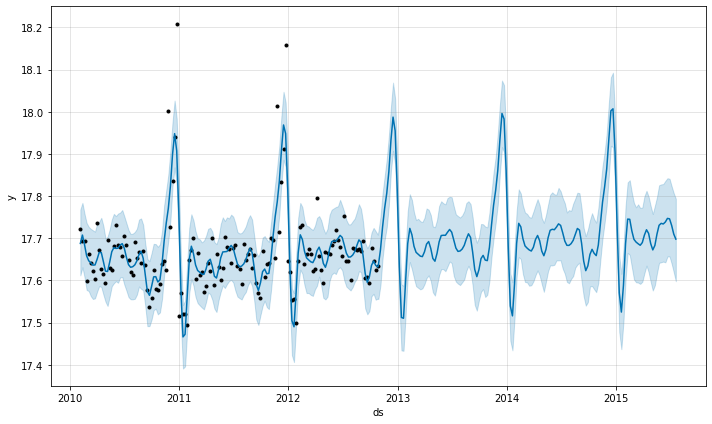

In [ ]:
figure = model.plot(forecast_data)

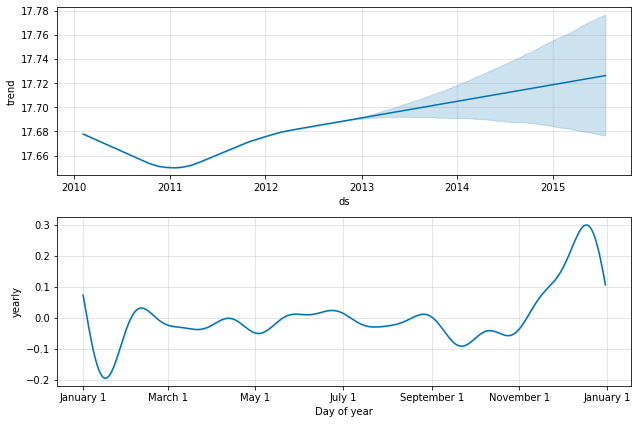

In [ ]:
figure_2 = model.plot_components(forecast_data)

Inverse transformation

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

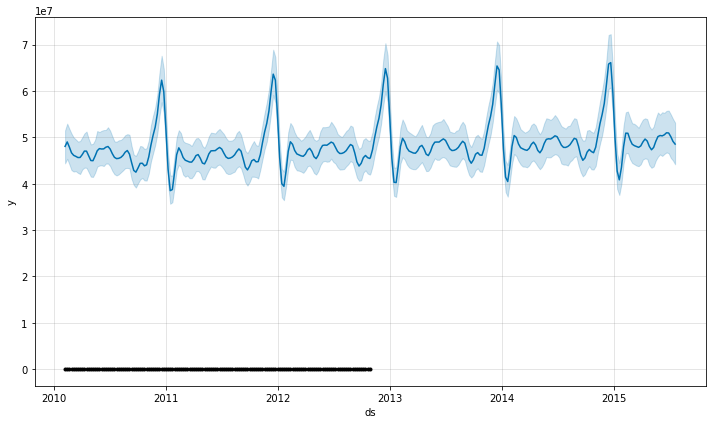

In [ ]:
figure_3 = model.plot(forecast_data_orig)

In [ ]:
df['y_log']=df['y']
df['y']=df['y_orig']
final_df = pd.DataFrame(forecast_data_orig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [ ]:
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])
df['ds'] = pd.to_datetime(df['ds'])
merged_left = pd.merge(forecast_data, df, on='ds')
metric_df = merged_left.filter(['ds','yhat', 'y'])

In [ ]:
print("MSE : % f" %(mean_squared_error(metric_df.y, metric_df.yhat)))
print("RMSE : % f" %(np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))))

MSE :  11913484651530.080078
RMSE :  3451591.611348


##Multi-Variate Forecasting

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/ts_FB_Walmart_.csv')
df2 = df2.rename(columns={'Weekly_Sales': 'y', 'Date':'ds'})
df2['y_orig'] = df2['y'] 
df2['y'] = np.log(df2['y'])

In [ ]:
df2.head()

,ds,y,Holiday_Flag,Fuel_Price,CPI,Unemployment,y_orig
0,5/2/2010,17.722536,0,2.717844,170.725418,8.150133,49750740.50
1,12/2/2010,17.693701,1,2.694022,175.603188,7.419533,48336677.63
2,19/2/2010,17.692466,0,2.672067,171.395827,8.097489,48276993.78
3,26/2/2010,17.598986,0,2.683933,168.354706,8.475289,43968571.13
4,5/3/2010,17.662920,0,2.731200,174.921137,7.508333,46871470.30


In [ ]:
model_new = Prophet()
model_new.add_regressor('Fuel_Price')
model_new.add_regressor('Unemployment')
model_new.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data2 = model_new.make_future_dataframe(periods=143, freq = 'W')

In [ ]:
future_data2 = df2[['ds','Fuel_Price','Unemployment']]
future_data2.head()

,ds,Fuel_Price,Unemployment
0,5/2/2010,2.717844,8.150133
1,12/2/2010,2.694022,7.419533
2,19/2/2010,2.672067,8.097489
3,26/2/2010,2.683933,8.475289
4,5/3/2010,2.731200,7.508333


In [ ]:
forecast_data2 = model_new.predict(future_data2)

In [ ]:
forecast_data2[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
138,2012-10-08,17.707265,17.615933,17.796836
139,2012-10-19,17.593422,17.505642,17.689103
140,2012-10-26,17.580345,17.492116,17.668699
141,2012-11-05,17.692315,17.600224,17.780241
142,2012-12-10,17.789913,17.700450,17.882751


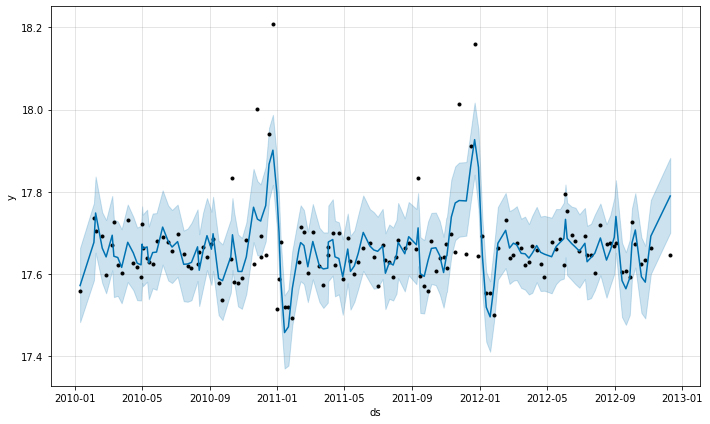

In [ ]:
figure_new_1 = model_new.plot(forecast_data2)

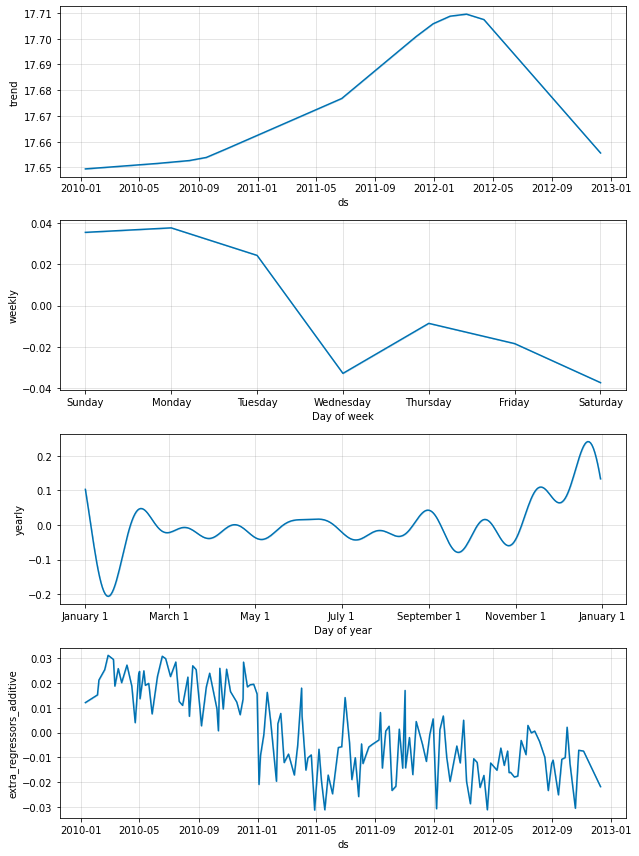

In [ ]:
figure_new_2 = model_new.plot_components(forecast_data2)

Inverse transformation

In [ ]:
forecast_data_orig2 = forecast_data2
forecast_data_orig2['yhat'] = np.exp(forecast_data_orig2['yhat'])
forecast_data_orig2['yhat_lower'] = np.exp(forecast_data_orig2['yhat_lower'])
forecast_data_orig2['yhat_upper'] = np.exp(forecast_data_orig2['yhat_upper'])

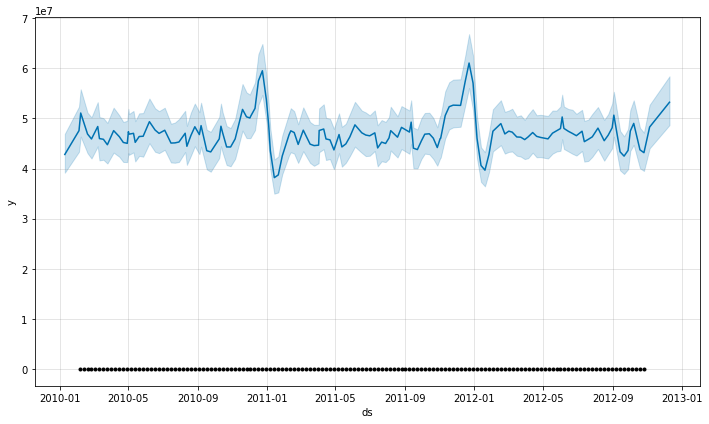

In [ ]:
figure_new_3 = model.plot(forecast_data_orig2)

In [ ]:
df2['y_log']=df2['y']
df2['y']=df2['y_orig']
final_df2 = pd.DataFrame(forecast_data_orig2)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=df2["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df2["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df2["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df2["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [ ]:
forecast_data2['ds'] = pd.to_datetime(forecast_data2['ds'])
df2['ds'] = pd.to_datetime(df2['ds'])
merged_left2 = pd.merge(forecast_data2, df2, on='ds')
metric_df2 = merged_left2.filter(['ds','yhat', 'y'])

In [ ]:
print("MSE : % f" %(mean_squared_error(metric_df2.y, metric_df2.yhat)))
print("RMSE : % f" %(np.sqrt(mean_squared_error(metric_df2.y, metric_df2.yhat))))

MSE :  15101012048327.195312
RMSE :  3886002.064890
